# Visual Analytics

## Overview: 
Use visualisation for analysis according the each research question starting from Q1 to Q4. Each research question has a slightly different preprocessed dataset, that originally comes from the same source, and undertook the same handling of missing values.

Q1: **Categorisation of Urban and Rural Stops**
- Question: How is the distribution of Stop Types and Bus Stop Types differentiated between rural and urban area and how do they influence the accessibility of public transport?

In [6]:
!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/110.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.1 MB/s eta 0:00:00


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

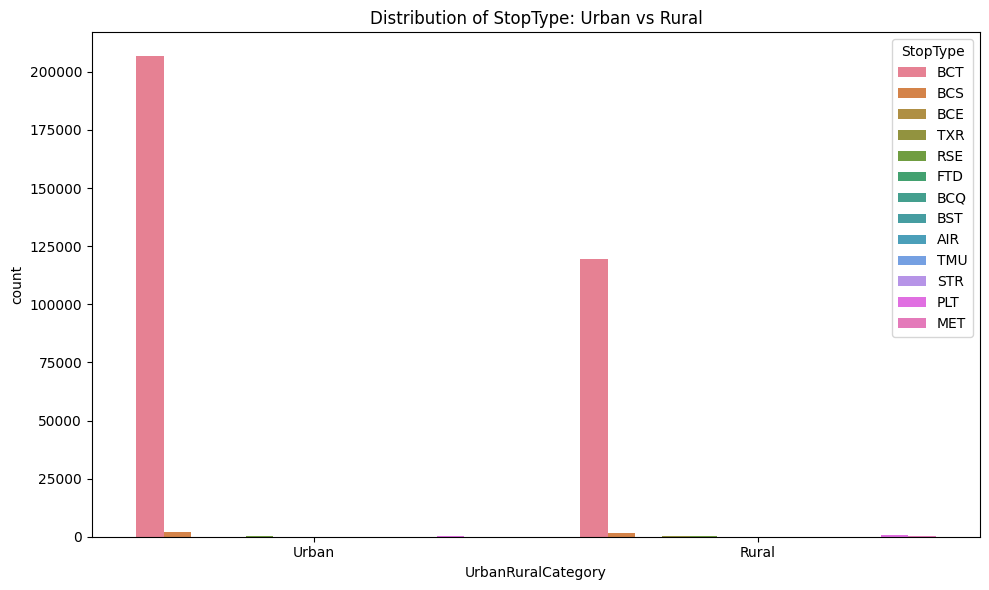

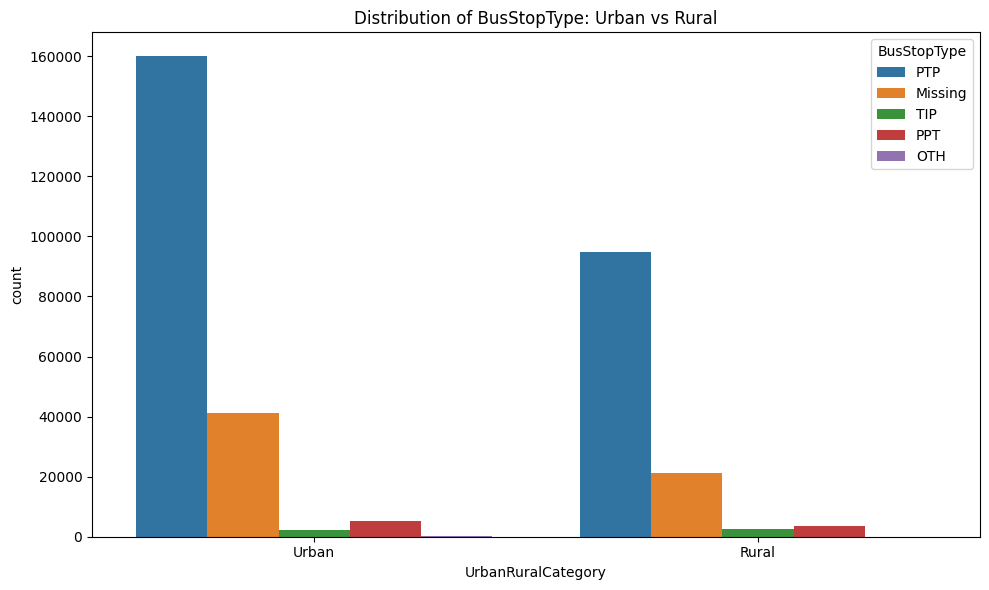

In [3]:
# Loading the dataset
data = pd.read_csv('../data/processed/q1_processed_stops.csv')

# 1. Stacked bar plot for StopType distribution between Urban and Rural
plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'StopType')
plt.title('Distribution of StopType: Urban vs Rural')
plt.tight_layout()
plt.savefig('../outputs/stop_type_distribution.png')  # Saving the plot
plt.show()

# 2. Stacked bar plot for BusStopType distribution between Urban and Rural
plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'BusStopType')
plt.title('Distribution of BusStopType: Urban vs Rural')
plt.tight_layout()
plt.savefig('../outputs/bus_stop_type_distribution.png')  # Saving the plot
plt.show()

In [ ]:
# Creating map centered around a specific location like London
m = folium.Map(location = [51.5074, -0.1278], zoom_start = 6)

# Initialising the  MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Adding stop markers to the map with colour coding based on Urban/Rural category
for _, row in data.iterrows():
    folium.CircleMarker(
        location = [row['Latitude'], row['Longitude']],
        radius = 5,
        color = 'blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        fill = True,
        fill_color = 'blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        fill_opacity = 0.7
    ).add_to(marker_cluster)

# Saving the map as an HTML file
m.save('../outputs/choropleth_map.html')
